# Jul 27th, 2022 (Ent dist nonzero + Deg perm)

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir

In [2]:
nn = 512
perc = 15
fig_dir = 'Fig6_Entropy'
fig_dir = pjoin(fig_base_dir, 'paper2.0', f'n{nn}-p{perc}', fig_dir)
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/Fig6_Entropy

## Prepare (512)

In [3]:
num_k = 7
mice = Mice(nn)
bt_dict, props_bo, props_ca = default_props(mice, num_k, perc=20)
bt = BootStrap(**props_ca)
pal = prepare_palette()

## Entropy

In [4]:
%%time

for mode, o in bt_dict.items():
    o.compute_entropy(
        use_prune=True,
        select_seeds=False,
    )

CPU times: user 7.28 s, sys: 23 s, total: 30.3 s
Wall time: 1min 1s


In [17]:
%%time

cut, se, bins, xs = cut4figs('h', bt_dict, bt.get_booter(int(1e2)))
len(xs), len(bins)

CPU times: user 14.3 s, sys: 2.06 s, total: 16.4 s
Wall time: 16.4 s


(50, 51)

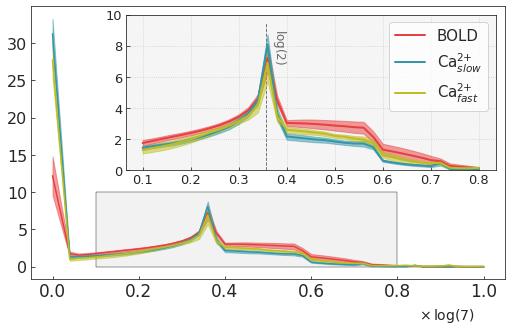

In [18]:
from figures.fig_ent import dist_ent_inset as go
fig, *_ = go(cut, se, xs, num_k, True)

In [19]:
bins

array([0.    , 0.02  , 0.04  , 0.06  , 0.08  , 0.1   , 0.12  , 0.14  ,
       0.16  , 0.18  , 0.2   , 0.22  , 0.24  , 0.26  , 0.28  , 0.3   ,
       0.32  , 0.34  , 0.36  , 0.38  , 0.4   , 0.42  , 0.44  , 0.46  ,
       0.48  , 0.5   , 0.52  , 0.54  , 0.56  , 0.58  , 0.6   , 0.62  ,
       0.64  , 0.66  , 0.68  , 0.7   , 0.72  , 0.74  , 0.76  , 0.78  ,
       0.8   , 0.82  , 0.84  , 0.86  , 0.88  , 0.9   , 0.92  , 0.94  ,
       0.96  , 0.98  , 1.0001])

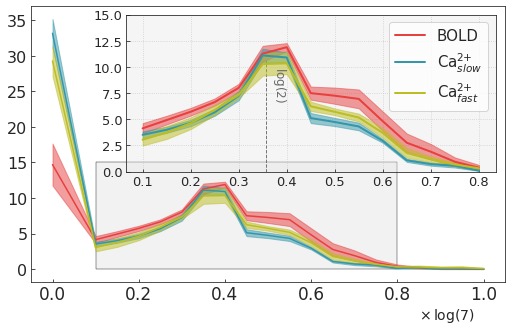

CPU times: user 11.7 s, sys: 584 ms, total: 12.3 s
Wall time: 12.3 s


In [25]:
%%time

cut, se, bins, xs = cut4figs('h', bt_dict, bt.get_booter(int(1e2)), num_bins=21, bin_edges=(0, 1))
fig, *_ = go(cut, se, xs, num_k, True, inset_ylim=(0, 15))

In [26]:
bins

array([0.    , 0.05  , 0.1   , 0.15  , 0.2   , 0.25  , 0.3   , 0.35  ,
       0.4   , 0.45  , 0.5   , 0.55  , 0.6   , 0.65  , 0.7   , 0.75  ,
       0.8   , 0.85  , 0.9   , 0.95  , 1.0001])

In [30]:
np.log(2)

0.6931471805599453

In [31]:
np.log(2) / np.log(7)

0.3562071871080222

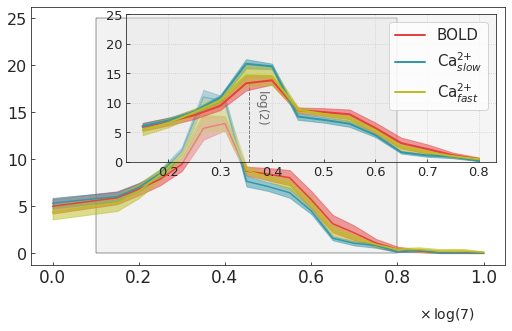

CPU times: user 11.4 s, sys: 525 ms, total: 11.9 s
Wall time: 11.9 s


In [35]:
%%time

cut, se, bins, xs = cut4figs('h', bt_dict, bt.get_booter(int(1e2)), num_bins=20, bin_edges=(0.05, 1))
fig, *_ = go(cut, se, xs, num_k, True, inset_ylim=(0, 25))

In [36]:
bins

array([0.05  , 0.1   , 0.15  , 0.2   , 0.25  , 0.3   , 0.35  , 0.4   ,
       0.45  , 0.5   , 0.55  , 0.6   , 0.65  , 0.7   , 0.75  , 0.8   ,
       0.85  , 0.9   , 0.95  , 1.0001])

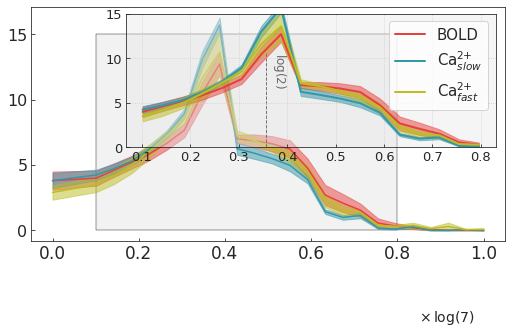

CPU times: user 11.9 s, sys: 1.13 s, total: 13 s
Wall time: 13 s


In [14]:
%%time

cut, se, bins, xs = cut4figs('h', bt_dict, bt.get_booter(int(1e2)), num_bins=25, bin_edges=(0.02, 1))
fig, *_ = go(cut, se, xs, num_k, True, inset_ylim=(0, 25))

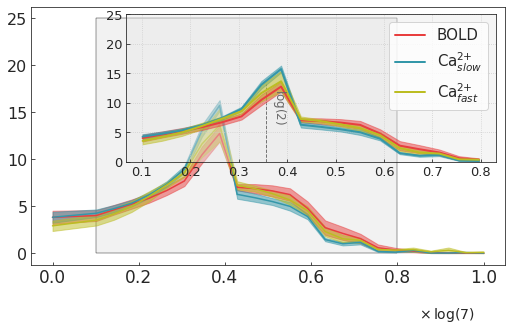

In [15]:
fig, *_ = go(cut, se, xs, num_k, True, inset_ylim=(0, 25))

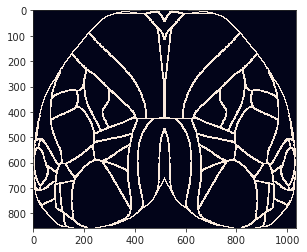

In [43]:
contour = bt.get_contour(0.2, False)
plt.imshow(contour);

## Deg perm

In [47]:
num_k = 7
mice = Mice(nn)
bt_dict, props_bo, props_ca = default_props(mice, num_k, perc)
bt = BootStrap(**props_ca)

for mode, o in bt_dict.items():
    o.compute_entropy(
        use_prune=True,
        select_seeds=False,
    )

In [48]:
def statistic(a, b, axis):
    return bn.nanmean(a - b, axis=axis)

### Actual values

In [52]:
y = {}
for mode, o in bt_dict.items():
    y[mode] = o.run_deg.reshape(-1, o.run_deg.shape[-1])

good_runs = ~functools.reduce(
    np.logical_or,
    [np.isnan(e).sum(1) == e.shape[-1] for e in y.values()]
)
y = {k: v[good_runs] for k, v in y.items()}

good_runs.sum()

108

In [50]:
%%time

results = {}
for mode1, mode2 in itertools.combinations(y, 2):
    test = sp_stats.permutation_test(
        data=(y[mode1], y[mode2]),
        statistic=statistic,
        permutation_type='samples',
        alternative='two-sided',
        n_resamples=int(1e4),
        vectorized=True,
        random_state=42,
        batch=5,
        axis=0,
    )
    reject = np_nans(len(test.pvalue))
    pvals = np_nans(len(test.pvalue))
    nonan = np.isfinite(test.pvalue)

    corrected = multipletests(
        pvals=test.pvalue[nonan],
        alpha=0.05,
        method='fdr_bh',
        is_sorted=False,
        returnsorted=False,
    )
    reject[nonan] = corrected[0]
    pvals[nonan] = corrected[1]

    results[(mode1, mode2)] = test.statistic, reject, pvals

CPU times: user 23.8 s, sys: 3.45 ms, total: 23.8 s
Wall time: 23.8 s


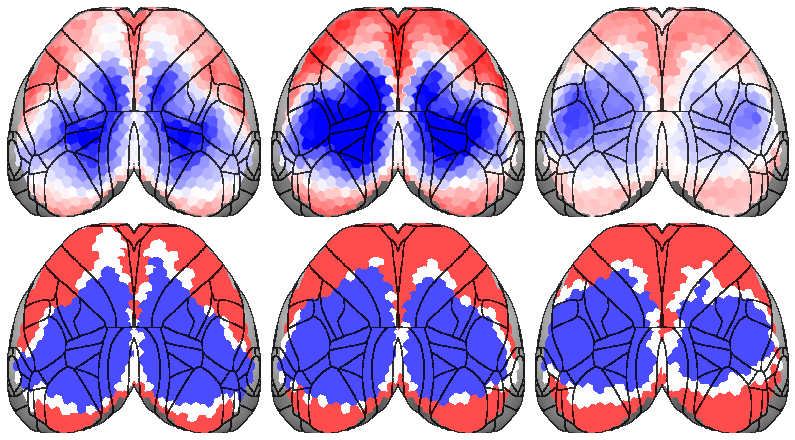

In [53]:
fig, axes = create_figure(
    nrows=2,
    ncols=3,
    figsize=(11, 6),
    tight_layout=False,
    constrained_layout=True,
)
for i, ((lbl_1, lbl_2), (s, r, p)) in enumerate(results.items()):
    ax = axes[0, i]
    vminmax = 100
    ax = ctx2ax(
        x=s,
        ax=ax,
        base=bt,
        vmin=-vminmax,
        vmax=vminmax,
        cmap='bwr',
        cbar=False,
        contour=contour,
        contour_cmap='Greys_r',
        interp='antialiased',
    )
    # ax.set_title(f"{lbl_1} - {lbl_2}", y=1.05, fontsize=17)

    cmap = sns.color_palette('bwr', as_cmap=True)
    cmap = matplotlib.colors.ListedColormap(
        [cmap(0.15), cmap(0.5), cmap(0.85)])
    ax = axes[1, i]
    x = s.copy()
    x[x < 0] = -1
    x[x > 0] = 1
    x[r == 0] = 0
    ax = ctx2ax(
        x=x,
        ax=ax,
        base=bt,
        vmin=-1,
        vmax=1,
        cmap=cmap,
        cbar=False,
        contour=contour,
        contour_cmap='Greys_r',
        interp='none',
    )
remove_ticks(axes)

# fig.savefig(pjoin(fig_dir, 'perm.png'), **kws_fig)

plt.show()

### Ranks

In [55]:
y = {}
for mode, o in bt_dict.items():
    y[mode] = o.run_dr.reshape(-1, o.run_dr.shape[-1])

good_runs = ~functools.reduce(
    np.logical_or,
    [np.isnan(e).sum(1) == e.shape[-1] for e in y.values()]
)
y = {k: v[good_runs] for k, v in y.items()}

good_runs.sum()

108

In [56]:
%%time

results = {}
for mode1, mode2 in itertools.combinations(y, 2):
    test = sp_stats.permutation_test(
        data=(y[mode1], y[mode2]),
        statistic=statistic,
        permutation_type='samples',
        alternative='two-sided',
        n_resamples=int(1e4),
        vectorized=True,
        random_state=42,
        batch=5,
        axis=0,
    )
    reject = np_nans(len(test.pvalue))
    pvals = np_nans(len(test.pvalue))
    nonan = np.isfinite(test.pvalue)

    corrected = multipletests(
        pvals=test.pvalue[nonan],
        alpha=0.05,
        method='fdr_bh',
        is_sorted=False,
        returnsorted=False,
    )
    reject[nonan] = corrected[0]
    pvals[nonan] = corrected[1]

    results[(mode1, mode2)] = test.statistic, reject, pvals

CPU times: user 23.9 s, sys: 22.2 ms, total: 23.9 s
Wall time: 23.9 s


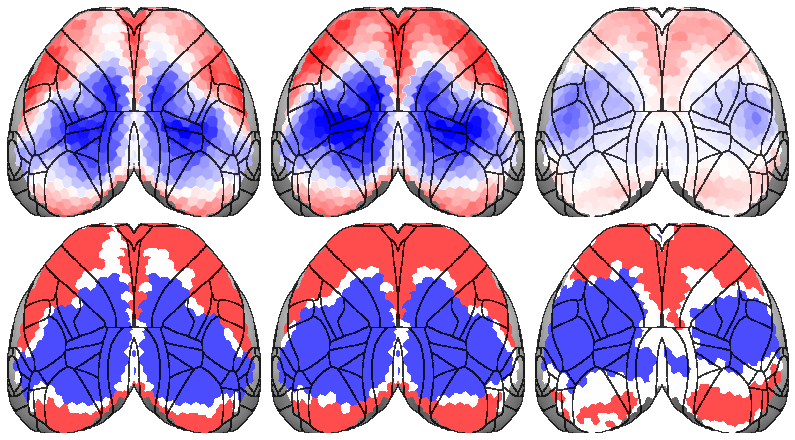

In [59]:
fig, axes = create_figure(
    nrows=2,
    ncols=3,
    figsize=(11, 6),
    tight_layout=False,
    constrained_layout=True,
)
for i, ((lbl_1, lbl_2), (s, r, p)) in enumerate(results.items()):
    ax = axes[0, i]
    vminmax = 0.6
    ax = ctx2ax(
        x=s,
        ax=ax,
        base=bt,
        vmin=-vminmax,
        vmax=vminmax,
        cmap='bwr',
        cbar=False,
        contour=contour,
        contour_cmap='Greys_r',
        interp='antialiased',
    )
    # ax.set_title(f"{lbl_1} - {lbl_2}", y=1.05, fontsize=17)

    cmap = sns.color_palette('bwr', as_cmap=True)
    cmap = matplotlib.colors.ListedColormap(
        [cmap(0.15), cmap(0.5), cmap(0.85)])
    ax = axes[1, i]
    x = s.copy()
    x[x < 0] = -1
    x[x > 0] = 1
    x[r == 0] = 0
    ax = ctx2ax(
        x=x,
        ax=ax,
        base=bt,
        vmin=-1,
        vmax=1,
        cmap=cmap,
        cbar=False,
        contour=contour,
        contour_cmap='Greys_r',
        interp='none',
    )
remove_ticks(axes)

# fig.savefig(pjoin(fig_dir, 'perm.png'), **kws_fig)

plt.show()

## Deg weighted

In [ ]:
num_k = 7
mice = Mice(nn)


for mode, o in bt_dict.items():
    o.compute_entropy(
        use_prune=True,
        select_seeds=False,
    )

In [23]:
nn = 512
mice = Mice(nn)

bt_dict, props_bo, props_ca = default_props(mice)
bt = BootStrap(**props_ca)

In [35]:
kwargs = {'task': 'rest'}
a_bo, _ = collect_adjacencies(mice, 'bold-lite', **kwargs)

kwargs = {
    'task': 'rest',
    'band_ca': (0.01, 0.5),
}
a_cas, _ = collect_adjacencies(mice, 'ca2', **kwargs)

kwargs = {
    'task': 'rest',
    'band_ca': 0.5,
}
a_caf, _ = collect_adjacencies(mice, 'ca2', **kwargs)

In [62]:
x = bn.nanmean(bn.nanmean(a_cas, -1), -1)
bad = x > np.nanquantile(x, 0.9)
a_cas[bad] = np.nan

In [63]:
x = bn.nanmean(bn.nanmean(a_caf, -1), -1)
bad = x > np.nanquantile(x, 0.9)
a_caf[bad] = np.nan

In [64]:
a_cas.shape

(110, 542, 542)

<matplotlib.colorbar.Colorbar object at 0x7fecd203fcd0>

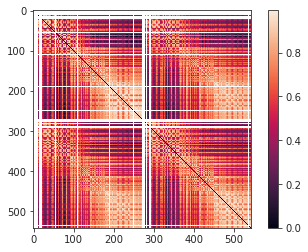

In [69]:
plt.imshow(a_cas[1])
plt.colorbar()

In [70]:
a_bo[a_bo < 0] = 0
a_cas[a_cas < 0] = 0
a_caf[a_caf < 0] = 0

In [71]:
d_bo = bn.nanmean(a_bo, 0).sum(0)
d_cas = bn.nanmean(a_cas, 0).sum(0)
d_caf = bn.nanmean(a_caf, 0).sum(0)

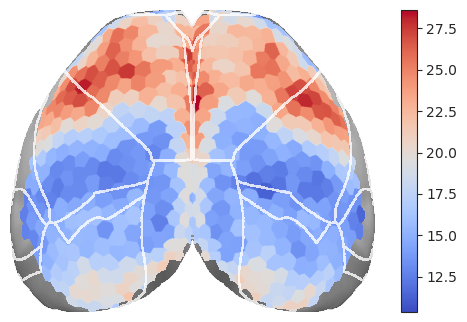

In [72]:
_ = bt.show(
    data=d_bo,
    vmin=np.nanmin(d_bo),
    vmax=np.nanmax(d_bo),
    cmap='coolwarm',
    cbar=True,
    figsize=(7, 4),
)

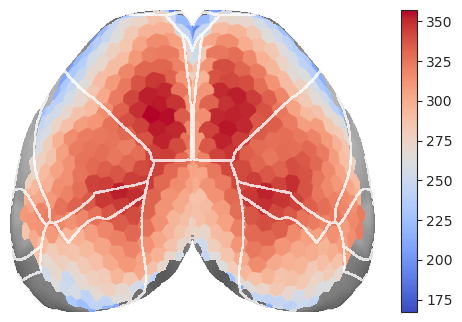

In [73]:
_ = bt.show(
    data=d_cas,
    vmin=np.nanmin(d_cas),
    vmax=np.nanmax(d_cas),
    cmap='coolwarm',
    cbar=True,
    figsize=(7, 4),
)

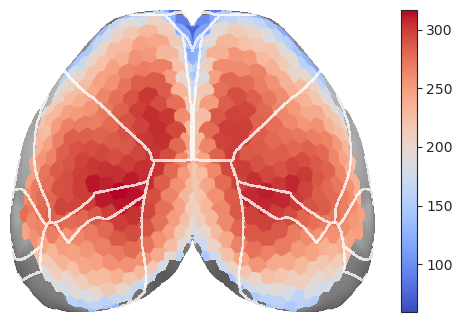

In [74]:
_ = bt.show(
    data=d_caf,
    vmin=np.nanmin(d_caf),
    vmax=np.nanmax(d_caf),
    cmap='coolwarm',
    cbar=True,
    figsize=(7, 4),
)